In [59]:
%matplotlib widget
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os
import json
from collections import defaultdict
import random
from PIL import Image
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
from umap.umap_ import UMAP as UMAP
from matplotlib.colors import BoundaryNorm, ListedColormap

In [5]:
img_path = "/media/user-1/CameraTraps/NINA/Images/"
with open(img_path + "metadata.json") as f:
    metadata = json.load(f)

In [6]:
translation_dict = {
    "hare": "Rabbit",
    'rã¥dyr': "Deer",
    'hjortdyr': "Deer",
    "rev": "Fox",
    "ekorn": "Squirrel",
    "gaupe": "Lynx",
    "grevling": "Weasel",
    "mårdyr": "Weasel",
    "mår": "Weasel",
    'mã¥r': "Weasel",
    "fugl": "Bird",
    "Ulv": "Wolf",
    "katt": "Cat",
    'smã¥gnager': "Rodent", # maybe inaccurate
    'skogshã¸ns': "Bird",
    'nã¸tteskrike': "Bird",
    'bjã¸rn': "Bear",
    'villsvin': "Boar",
    'sau': "Sheep",
    'skjã¦re': "Bird",
    'ulv': "Wolf",
    'storfe': "Cattle"
}


def load_imgs(metadata):
    d = defaultdict(list)

    for entry in metadata['annotations']:
        s = entry['Species']
        if s in translation_dict:
            s = translation_dict[s]
        entry['Species'] = s
        d[entry['Species']].append(entry)

    categories = list(d.keys())
    for entry in metadata['annotations']:
        entry['Species_ID'] = categories.index(entry['Species'])
    keep = []
    for key in d.keys():
        keep.extend(random.sample(d[key], 100))
    print(d.keys(), len(d.keys()))
    imgs = []
    ids = []
    classes = list(d.keys())
    for entry in keep:
        im = Image.open(img_path + entry['Filename'])
        im = im.resize((128, 128))
        imgs.append(np.array(im).ravel())
        ids.append(classes.index(entry['Species']))
    
    return {"Labels": keep, "Data": np.array(imgs), "Targets": np.array(ids)}


data = load_imgs(metadata)

dict_keys(['Fox', 'Deer', 'Weasel', 'Bird', 'Lynx', 'Cat', 'Sheep', 'Squirrel', 'Rabbit', 'Rodent', 'Cattle', 'Boar', 'Wolf', 'Bear']) 14


In [7]:
neigh = 50
dist = 0.01

reducer = UMAP(random_state=42, n_components=2, n_neighbors=neigh, min_dist=dist)
reducer.fit(data['Data'])
embedding = reducer.transform(data['Data'])

# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'UMAP projection of the Viltkamera dataset')

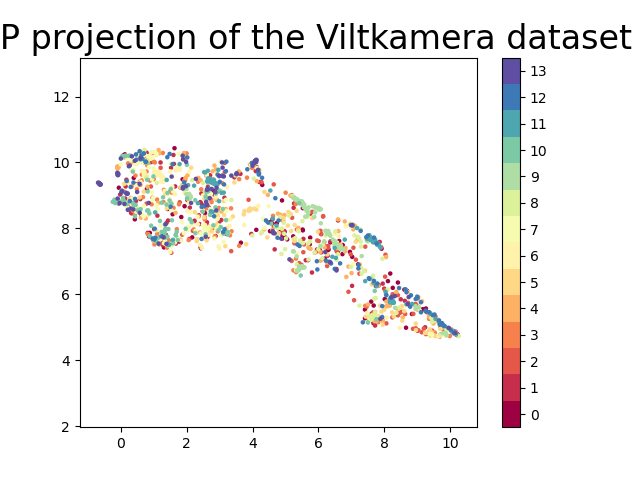

In [8]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=data['Targets'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(15)-0.5).set_ticks(np.arange(14))
plt.title('UMAP projection of the Viltkamera dataset', fontsize=24)

In [9]:
neigh = 50
dist = 0.01
reducer = UMAP(random_state=42, n_components=3, n_neighbors=neigh, min_dist=dist)
reducer.fit(data['Data'])
embedding = reducer.transform(data['Data'])
assert(np.all(embedding == reducer.embedding_))

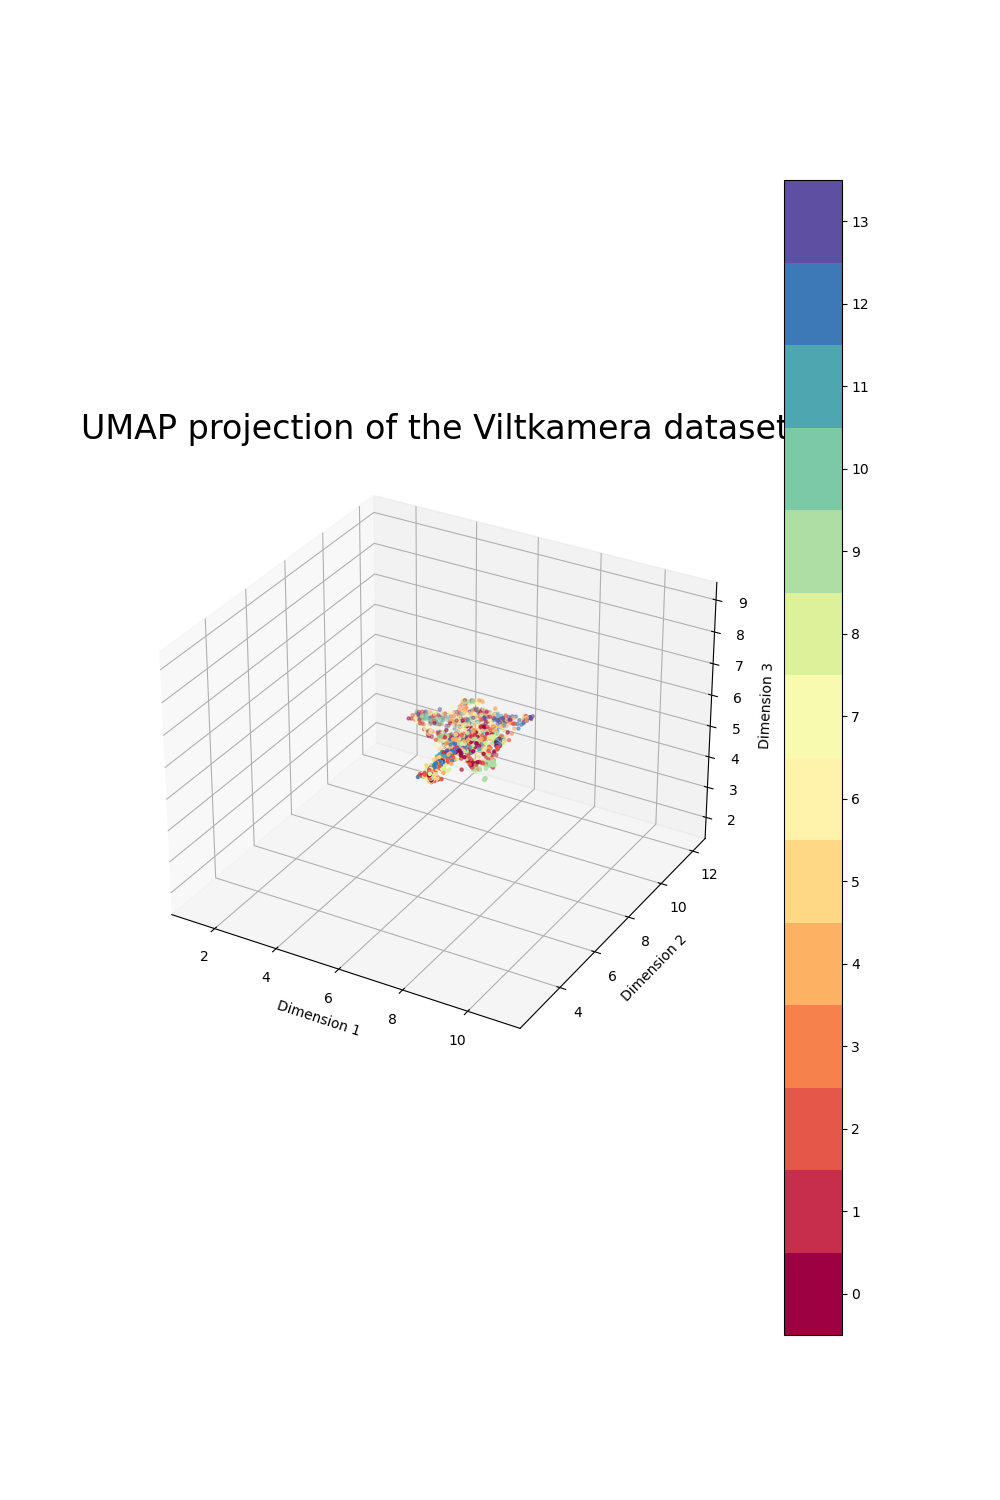

In [10]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=data['Targets'], 
    cmap='Spectral', 
    s=5)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.gca().set_aspect('equal', 'datalim')

# Create a ScalarMappable object and use it to create the colorbar
sm = cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=data['Targets'].min(), vmax=data['Targets'].max()))
sm._A = []  # Required for matplotlib < 3.4.0
cbar = plt.colorbar(sm, ax=ax, boundaries=np.arange(15)-0.5)
cbar.set_ticks(np.arange(14))

plt.title('UMAP projection of the Viltkamera dataset', fontsize=24)

plt.show()

In [11]:
embeddings = []
for neigh in [3, 5, 10, 15, 20, 50, 100, 200]:
    for dist in np.linspace(0.01, .99, 5):
        print(neigh, dist)
        reducer = UMAP(random_state=42, n_components=3, n_neighbors=neigh, min_dist=dist)
        reducer.fit(data['Data'])
        embedding = reducer.transform(data['Data'])
        assert(np.all(embedding == reducer.embedding_))
        embeddings.append(embedding)

3 0.01


/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3 0.255


/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3 0.5


/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3 0.745


/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3 0.99


/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


5 0.01
5 0.255
5 0.5
5 0.745
5 0.99
10 0.01
10 0.255
10 0.5
10 0.745
10 0.99
15 0.01
15 0.255
15 0.5
15 0.745
15 0.99
20 0.01
20 0.255
20 0.5
20 0.745
20 0.99
50 0.01
50 0.255
50 0.5
50 0.745
50 0.99
100 0.01
100 0.255
100 0.5
100 0.745
100 0.99
200 0.01
200 0.255
200 0.5
200 0.745
200 0.99


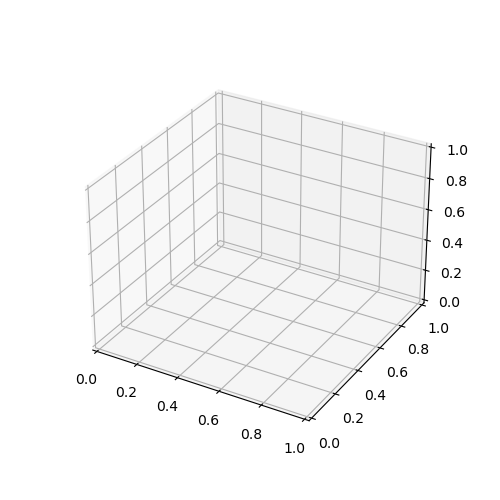

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

loops = len(embeddings)
def animate(n):
    ax.clear()
    # ax.set_xlim([0, 15])
    # ax.set_ylim([0, 15])
    # ax.set_zlim([0, 6])

    x = embeddings[n][:, 0]
    y = embeddings[n][:, 1]
    z = embeddings[n][:, 2]
    scatter = ax.scatter(x, y, z, c=data['Targets'], cmap='Spectral')
    ax.set_title("iteration {}/{}".format(n+1, loops))

ani = FuncAnimation(fig, animate, frames=loops, interval=2000)
plt.show()

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

loops = len(embeddings)
def animate(n):
    ax.clear()
    # ax.set_xlim([0, 15])
    # ax.set_ylim([0, 15])
    # ax.set_zlim([0, 6])

    x = embeddings[n][:, 0]
    y = embeddings[n][:, 1]
    z = embeddings[n][:, 2]
    scatter = ax.scatter(x, y, z, c=data['Targets'], cmap='Spectral')
    ax.set_title("iteration {}/{}".format(n+1, loops))

ani = FuncAnimation(fig, animate, frames=loops, interval=2000)
plt.show()

In [1]:
import matplotlib.pyplot as plt
from umap.umap_ import UMAP as UMAP
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np
import json

/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/d

In [2]:
def get_samples(bp):
    with open(bp + "metadata.json") as f:
        metadata = json.load(f)

    categories = metadata['categories']
    annotations = metadata['annotations']


    return categories, annotations

In [3]:
bp = "/media/user-1/CameraTraps/NINA/Images/"
categories, annotations = get_samples(bp)

In [4]:
categories

{'Fox': 22168,
 'Deer': 83039,
 'Weasel': 23332,
 'Bird': 10118,
 'Lynx': 4002,
 'Cat': 1638,
 'Sheep': 5011,
 'Squirrel': 5819,
 'Rabbit': 12552,
 'Rodent': 724,
 'Cattle': 466,
 'Boar': 393,
 'Wolf': 1256,
 'Bear': 115}

In [11]:
x = []
y = []
label = []
coordinates = []
datetime = []
env = []
label = []

for anot in annotations[:50000]:
    if(anot['Species_ID'] != 3 and anot['Species_ID'] != 4 and anot['Species_ID'] != 6):
        continue
    coordinates.append((anot['Latitude'], anot['Longitude']))
    y.append(anot['Latitude'])
    x.append(anot['Longitude'])
    # label.append(anot['Species'])
    dt = anot['datetime_vector']
    env.append(anot['env_vector'][366:])
    if(np.array(dt).sum() == 0):
        month = 0
        day = 0
        hour = 0
    else:
        month = dt[:12].index(1.0) + 1
        day = dt[12:12+31].index(1.0) + 1
        hour = dt[12+31:].index(1.0)
    datetime.append(anot['datetime_vector'])
    label.append(anot['Species_ID'])

env = np.array(env)
label = np.array(label)

In [13]:
reducer = UMAP(random_state=42, n_components=3)

In [14]:
embedding = reducer.fit_transform(datetime)
embedding.shape


(4808, 3)

In [15]:
fig = None

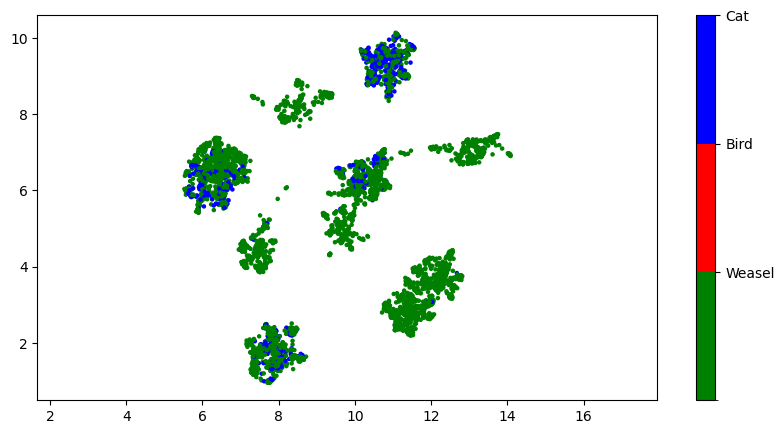

In [20]:
# memory management stuff
if(fig is None):
    fig = plt.figure()
plt.close(fig)

cmap = ListedColormap(['green', 'red', 'blue']) # Add more colors if you have more classes
bounds = np.array([3, 4, 5, 6]) + .5 # Add more boundaries if you have more classes
norm = BoundaryNorm(bounds, cmap.N)
labels = ["Weasel", "Bird", "Cat"] # Add more labels if you have more classes

fig = plt.figure(figsize=(10, 5))
sc = plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap=cmap, norm=norm, s=5)
plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(sc, ticks=bounds[1:])
cbar.set_ticklabels(labels)


# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     embedding[:, 2],
#     c=label, 
#     cmap='Spectral', 
#     s=5)

# ax.set_xlabel('Dimension 1')
# ax.set_ylabel('Dimension 2')
# ax.set_zlabel('Dimension 3')
# plt.gca().set_aspect('equal', 'datalim')

# # Create a ScalarMappable object and use it to create the colorbar
# sm = cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=label.min(), vmax=label.max()))
# sm._A = []  # Required for matplotlib < 3.4.0
# cbar = plt.colorbar(sm, ax=ax, boundaries=np.arange(15)-0.5)
# cbar.set_ticks(np.arange(14))

# plt.title('UMAP projection of the Viltkamera dataset', fontsize=24)
# plt.show()


In [27]:
np.unique(label)

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])